In [24]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../../")

from experiment import Exp

from dataloaders import data_set,data_dict
import torch
import yaml
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import numpy as np
from tqdm import tqdm
import pandas as pd
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

In [2]:
args = dotdict()   

args.freq_save_path   = r"E:\TECO_Works\Conference\ISWC2022\Freq_data"
args.window_save_path = r"E:\TECO_Works\Conference\ISWC2022\Sliding_window"
args.root_path        = r"E:\datasets"

args.drop_transition  = False

args.batch_size       = 128
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.85

In [3]:
# 哪个数据集
args.data_name           =  "hapt"  # rw hapt

# 是否作augmentation difference
args.difference          =  False 

# 是否作augmentation  filtering
args.filtering           =  False

# 是否作augmentation  magnitude
args.magnitude           =  False
args.weighted_sampler    = False


# 是在load数据的时候  wavelet_filtering
args.wavelet_filtering   = True
args.number_wavelet_filtering = 10

args.datanorm_type       =  "standardization" # None ,"standardization", "minmax"

args.pos_select          = None
args.sensor_select       = None



args.representation_type = "time"
args.exp_mode            = "LOCV"

config_file = open('../../configs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]
args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
window_seconds       = config["window_seconds"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.c_in            =  config["num_channels"]

args.input_length    =  args.windowsize
# input information
if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1

In [4]:
dataset = data_dict[args.data_name](args)

 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------


In [5]:
color_map  = {"acc_x":'#1f77b4',"acc_y":'#ff7f0e', "acc_z":'#2ca02c',
              "gyro_x":'#d62728',"gyro_y":'#9467bd',"gyro_z":'#8c564b'}

acc_cols   = ["acc_x","acc_y","acc_z"]
gyro_cols  = ["gyro_x","gyro_y","gyro_z"]
colors     = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Data Augmentation Channel

## ref
1. A public domain dataset for human activity recognition using smartphones
2. Separating movement and gravity components in an acceleration signal and implications for the assessment of human daily physical activity
3. InnoHAR: A deep neural network for complex human activity recognition

## get first random sample

In [6]:
index = 1000
# load window index
window_start , windwow_end = dataset.train_slidingwindows[index][1:]
window_value_1 = dataset.data_x.iloc[window_start:windwow_end,1:-1]

# get the window label
label_map = {}
for item in dataset.label_map:
    label_map[item[0]] = item[1]
window_label = dataset.data_y.iloc[window_start:windwow_end].mode().loc[0]
label_1 = label_map[window_label]
    
window_value_1.columns = ["acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z"]
window_value_1.reset_index(drop=True, inplace=True)
print(label_1)

WALKING_UPSTAIRS


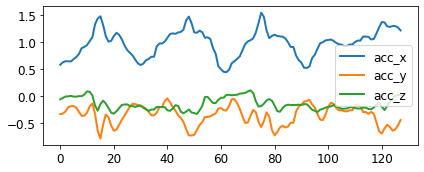

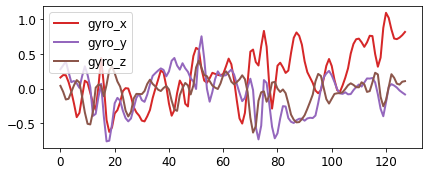

In [7]:
plt.figure(figsize=(6,2.5))
for col in acc_cols:
    plt.plot(window_value_1[col],c = color_map[col], linewidth=2,label = col)
plt.legend(fontsize=12)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\original_acc.png",dpi=300,transparent=True)
plt.show()

plt.figure(figsize=(6,2.5))
for col in gyro_cols:
    plt.plot(window_value_1[col],c = color_map[col], linewidth=2,label = col)
plt.legend(fontsize=12)
#plt.axis('off')
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\original_gyro.png",dpi=300,transparent=True)
plt.show()

## get second random sample

In [8]:
index = 106
window_start , windwow_end = dataset.train_slidingwindows[index][1:]

window_value_2 = dataset.data_x.iloc[window_start:windwow_end,1:-1]
window_label_2 = dataset.data_y.iloc[window_start:windwow_end].mode().loc[0]
label_2 = label_map[window_label_2]
    
window_value_2.columns = ["acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z"]
window_value_2.reset_index(drop=True, inplace=True)
print(label_2)

WALKING


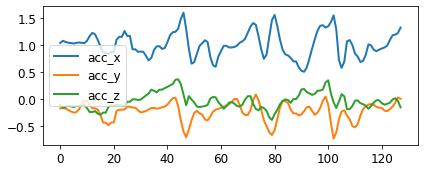

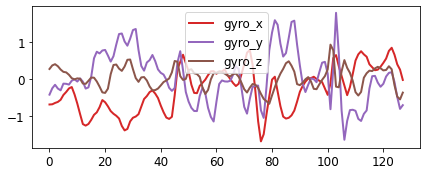

In [9]:
plt.figure(figsize=(6,2.5))
for col in acc_cols:
    plt.plot(window_value_2[col],c = color_map[col], linewidth=2,label = col)
plt.legend(fontsize=12)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\original_acc.png",dpi=300,transparent=True)
plt.show()

plt.figure(figsize=(6,2.5))
for col in gyro_cols:
    plt.plot(window_value_2[col],c = color_map[col], linewidth=2,label = col)
plt.legend(fontsize=12)
#plt.axis('off')
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\original_gyro.png",dpi=300,transparent=True)
plt.show()

## Grav and Acceleration Separation/ Difference

### Differencing

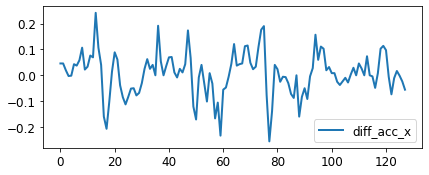

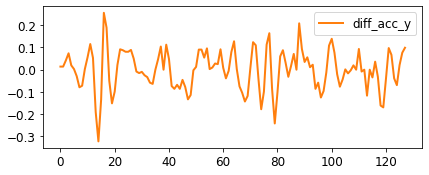

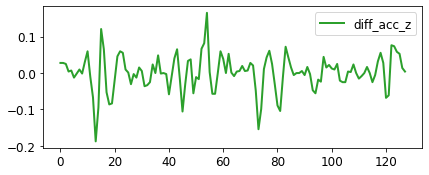

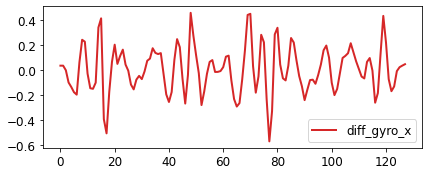

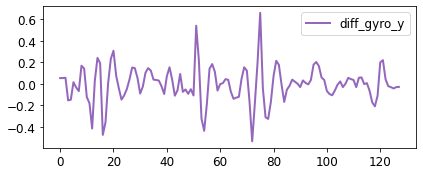

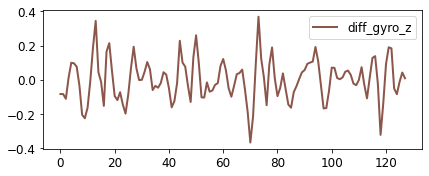

In [10]:
# Sample 1
for col in window_value_1.columns:
    temp = window_value_1[col]
    temp = temp.diff()
    temp.fillna(method ="backfill",inplace=True)
    plt.figure(figsize=(6,2.5))
    plt.plot(temp,c = color_map[col], linewidth=2,label = "diff_"+col)
    plt.legend(fontsize=12)
    #plt.axis('off')
    plt.tight_layout()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

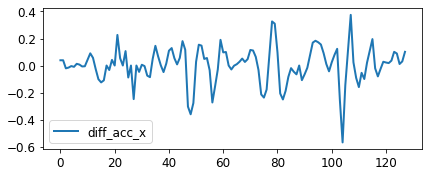

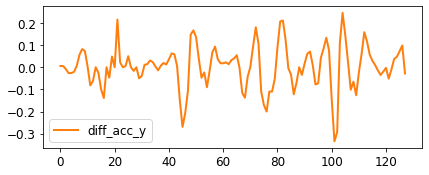

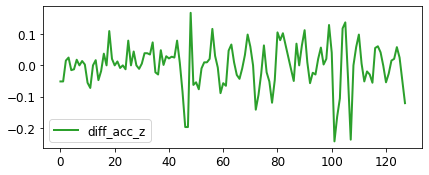

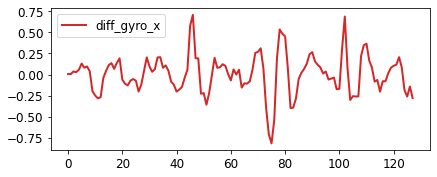

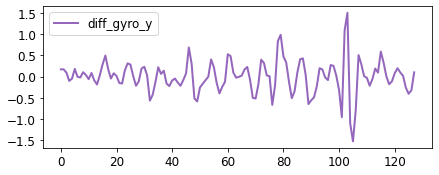

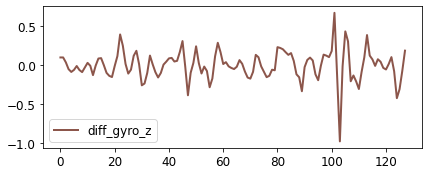

In [11]:
# sample 2
for col in window_value_2.columns:
    temp = window_value_2[col]
    temp = temp.diff()
    temp.fillna(method ="backfill",inplace=True)
    plt.figure(figsize=(6,2.5))
    plt.plot(temp,c = color_map[col], linewidth=2,label = "diff_"+col)
    plt.legend(fontsize=12)
    #plt.axis('off')
    plt.tight_layout()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

### Gravity/Body seperation

In [14]:
from dataloaders.utils import Normalizer,components_selection_one_signal

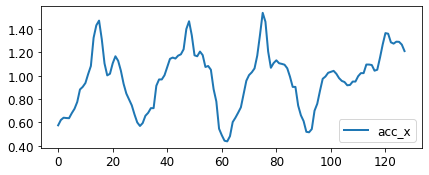

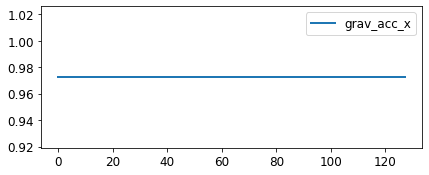

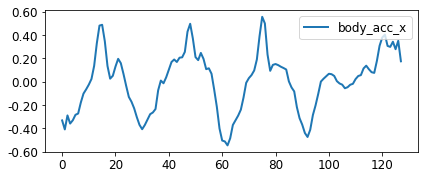

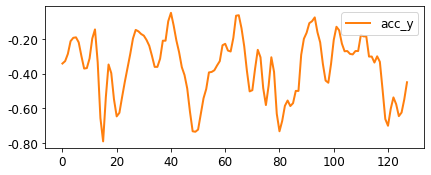

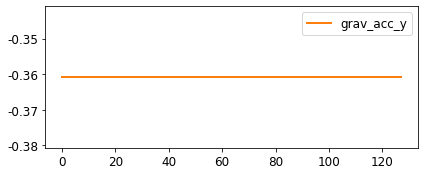

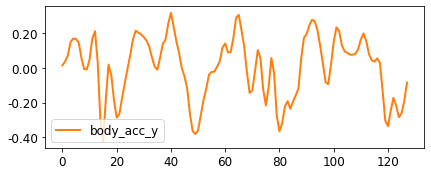

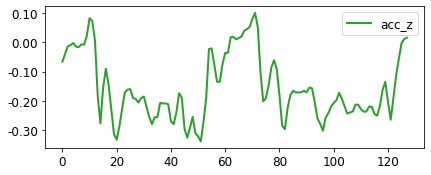

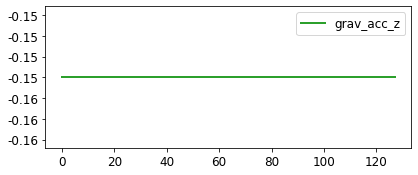

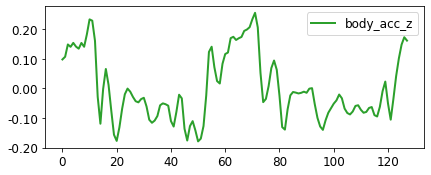

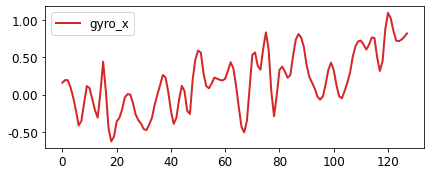

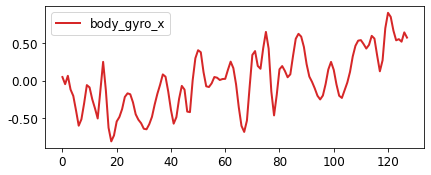

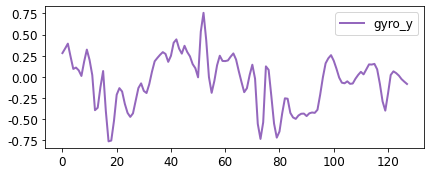

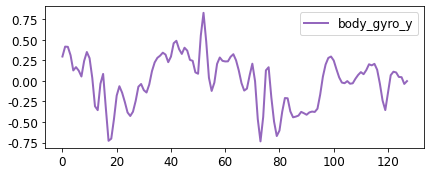

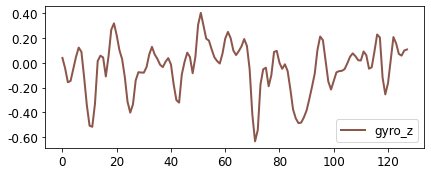

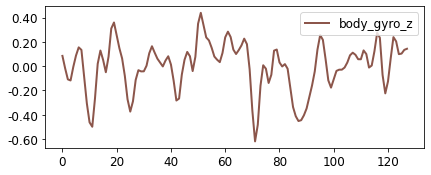

In [15]:
for col in window_value_1.columns:
    temp = window_value_1[col]
    if "acc" in col:
        grav, body = components_selection_one_signal(window_value_1[col],0.3,20,50)
        plt.figure(figsize=(6,2.5))
        plt.plot(temp,c = color_map[col], linewidth=2,label = col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
        #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
        plt.figure(figsize=(6,2.5))
        plt.plot(grav,c = color_map[col], linewidth=2,label = "grav_"+col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
        
        plt.figure(figsize=(6,2.5))
        plt.plot(body,c = color_map[col], linewidth=2,label = "body_"+col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    else:
        _, body = components_selection_one_signal(window_value_1[col],0.3,20,50)
        plt.figure(figsize=(6,2.5))
        plt.plot(temp,c = color_map[col], linewidth=2,label = col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
        #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

        
        plt.figure(figsize=(6,2.5))
        plt.plot(body,c = color_map[col], linewidth=2,label = "body_"+col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places    

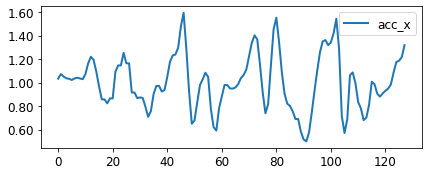

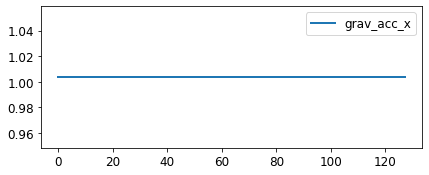

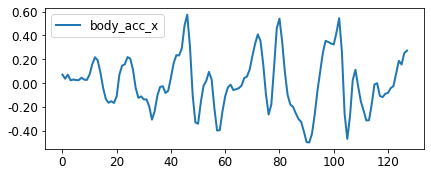

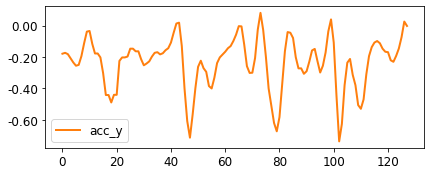

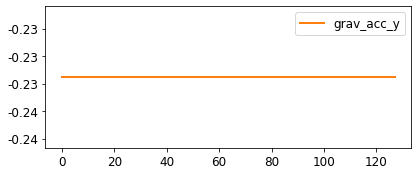

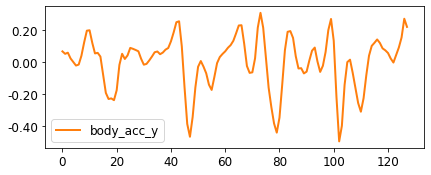

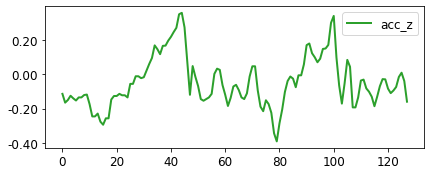

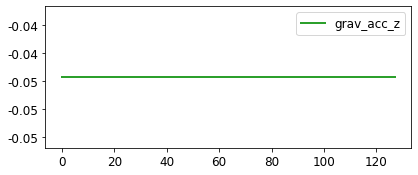

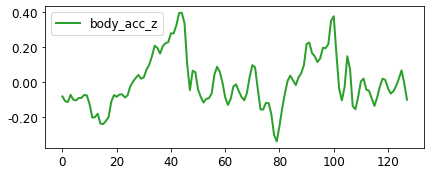

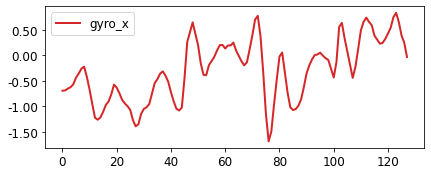

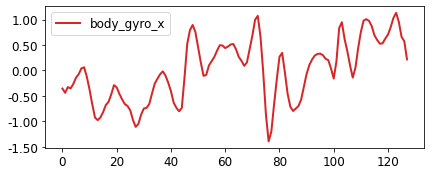

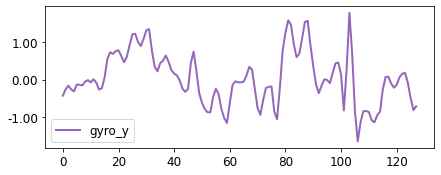

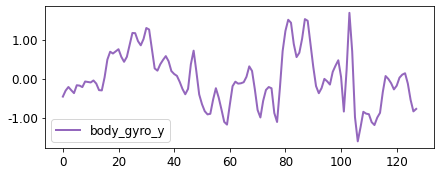

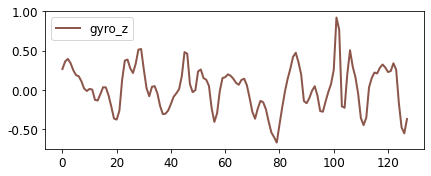

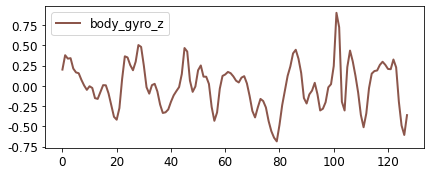

In [16]:
for col in window_value_2.columns:
    temp = window_value_2[col]
    if "acc" in col:
        grav, body = components_selection_one_signal(window_value_2[col],0.3,20,50)
        plt.figure(figsize=(6,2.5))
        plt.plot(temp,c = color_map[col], linewidth=2,label = col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
        #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
        plt.figure(figsize=(6,2.5))
        plt.plot(grav,c = color_map[col], linewidth=2,label = "grav_"+col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
        
        plt.figure(figsize=(6,2.5))
        plt.plot(body,c = color_map[col], linewidth=2,label = "body_"+col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    else:
        _, body = components_selection_one_signal(window_value_2[col],0.3,20,50)
        plt.figure(figsize=(6,2.5))
        plt.plot(temp,c = color_map[col], linewidth=2,label = col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
        #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

        
        plt.figure(figsize=(6,2.5))
        plt.plot(body,c = color_map[col], linewidth=2,label = "body_"+col)
        plt.legend(fontsize=12)
        #plt.axis('off')
        plt.tight_layout()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places    

## Magnitude

In [12]:
import numpy as np
import math
def mag_3_signals(x,y,z):# magnitude function redefintion
    return np.array([math.sqrt((x[i]**2+y[i]**2+z[i]**2)) for i in range(len(x))])

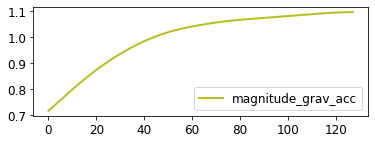

In [13]:


cols = list(grav_acc_xyz.keys())
grav_acc = mag_3_signals(grav_acc_xyz[cols[0]],grav_acc_xyz[cols[1]], grav_acc_xyz[cols[2]])

plt.figure(figsize=(6,2))
plt.plot(grav_acc, label='magnitude_grav_acc',c = '#bcbd22', linewidth=2)
plt.legend(fontsize=12)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format('magnitude_grav_acc'),dpi=300,transparent=True)
plt.show()

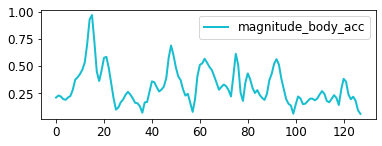

In [14]:
cols = list(body_acc_xyz.keys())
grav_acc = mag_3_signals(body_acc_xyz[cols[0]],body_acc_xyz[cols[1]], body_acc_xyz[cols[2]])

plt.figure(figsize=(6,2))
plt.plot(grav_acc, label='magnitude_body_acc',c = '#17becf', linewidth=2)
plt.legend(fontsize=12)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format('magnitude_body_acc'),dpi=300,transparent=True)
plt.show()

# Data Augmentation Mixup

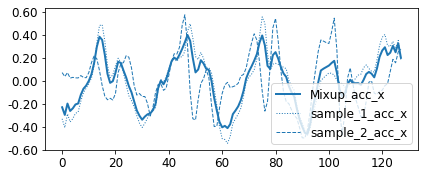

In [27]:
alpha = 0.5
batch_size = 1
#lam = np.random.beta(alpha, alpha, batch_size)
lam = 0.75
col = "acc_x"
_, body_1 = components_selection_one_signal(window_value_1[col],0.3,20,50)
_, body_2 = components_selection_one_signal(window_value_2[col],0.3,20,50)
mixed = body_1 * lam + body_2 * (1 - lam)

plt.figure(figsize=(6,2.5))
plt.plot(mixed_x,c = color_map[col], linewidth=2,label = "Mixup_"+col)
plt.plot(body_1,c = color_map[col], linestyle=":",linewidth=1,label = "sample_1_"+col)
plt.plot(body_2,c = color_map[col], linestyle="--",linewidth=1,label = "sample_2_"+col)
plt.legend(fontsize=12)
#plt.axis('off')
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places  

# Data Augmentation Random

In [30]:
col = "acc_x"
mixed = mixed.reshape(-1,1)

## Jitter Noise

In [78]:
def jitter(x: np.ndarray, sigma: float = 0.5):
    
    scale = np.random.uniform(0,sigma,1)[0]
    print(scale)
    channel_variance = np.std(x, axis=0)
    print(channel_variance)

    result = np.array(
        [
            x[:, idx]
            + np.random.normal(
                loc=0.0, scale=scale * channel_variance[idx], size=x.shape[0]
            )
            for idx in range(x.shape[1])
        ]
    ).transpose()
    return result

0.3370136440014376
[0.21462068]


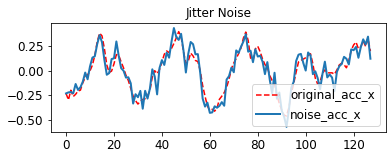

In [79]:

plt.figure(figsize=(6,2))
plt.plot(mixed, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(jitter(mixed), label="noise_"+col,c = color_map[col], linewidth=2)

plt.legend(fontsize=12)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Jitter Noise", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("noise_"+col),dpi=300,transparent=True)
plt.show()

## Expotional Smoothing

In [86]:
def expotional_smoothing(x, alpha: float = 0.5):
    x = x.transpose()
    length = x.shape[1]
    ret = np.zeros_like(x)
    for dim in range(x.shape[0]):
        ret[dim,0] =   x[dim,0] 
        for index in range(1,length):
            ret[dim,index] =   (1-alpha) * x[dim,index-1] + (alpha)* ret[dim,index-1]

    return ret.transpose()

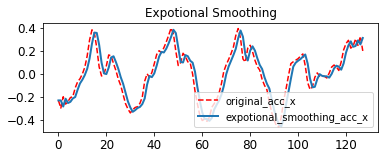

In [87]:
plt.figure(figsize=(6,2))
plt.plot(mixed, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(expotional_smoothing(mixed, alpha=0.2), label="expotional_smoothing_"+col,c = color_map[col], linewidth=2)
plt.legend(fontsize=10)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Expotional Smoothing", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("expotional_smoothing_"+col),dpi=300,tranparent=True)
plt.show()

## Moving Average

In [134]:
def moving_average(x, window_ratio_max = 0.06):
    df = pd.DataFrame(x)
    window_size = df.shape[0]
    print("window_size",window_size)
    window = max(1,int(window_size*np.random.uniform(0,window_ratio_max,1)[0]))
    print(window)
    ret = df.rolling(window =window).mean()
    ret = ret.interpolate(method='linear', limit_direction='both')
    return ret.values

window_size 128
6


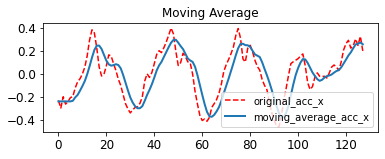

In [142]:
plt.figure(figsize=(6,2))
plt.plot(mixed, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(moving_average(mixed), label="moving_average_"+col,c = color_map[col], linewidth=2)
plt.legend(fontsize=10)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Moving Average", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("moving_average_"+col),dpi=300,tranparent=True)
plt.show()

## Magnitude scaling

[0.72270135]


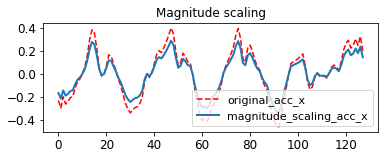

In [175]:
def scaling(x, sigma=0.15):
    # https://arxiv.org/pdf/1706.00527.pdf


    factor = np.random.normal(loc=1., scale=sigma, size=(x.shape[1]))
    print(factor)
    #factor = np.ones(x.shape[1]) * sigma

    return np.multiply(x, factor[np.newaxis,:])

plt.figure(figsize=(6,2))
plt.plot(mixed, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(scaling(mixed), label="magnitude_scaling_"+col,c = color_map[col], linewidth=2)
plt.legend(fontsize=11)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Magnitude scaling", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("Magnitude_scaling_"+col),dpi=300,tranparent=True)
plt.show()

## magnitude_warp

In [178]:
def magnitude_warp(x, sigma=0.4, knot=6):
    from scipy.interpolate import CubicSpline
    orig_steps = np.arange(x.shape[0])
    
    random_warps = np.random.normal(loc=1.0, scale=sigma, size=( knot, x.shape[1]))

    warp_steps = (np.ones((x.shape[1],1))*(np.linspace(0, x.shape[0]-1., num=knot))).T


    warper = np.array([CubicSpline(warp_steps[:,dim], random_warps[:,dim])(orig_steps) for dim in range(x.shape[1])]).T
    print(warper.shape)
    ret = x * warper
    #plt.plot(warper)

    return ret

(128, 1)


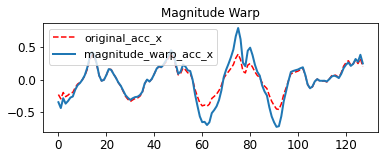

In [186]:
plt.figure(figsize=(6,2))
plt.plot(mixed, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(magnitude_warp(mixed), label="magnitude_warp_"+col,c = color_map[col], linewidth=2)
plt.legend(fontsize=11)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Magnitude Warp", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("Magnitude_warp_"+col),dpi=300,tranparent=True)
plt.show()

## Magnitude Shift

In [187]:
def magnitude_shift(x, max_ratio = 0.25):
    x = x.transpose()
    ratio = np.random.uniform(0,max_ratio,1)[0]
    ret = np.zeros_like(x)

    for dim in range(x.shape[0]):

        ret[dim,:] =x[dim,:]+max( np.mean(x[dim,:])*ratio,     np.std(x[dim,:])*ratio )
    return ret.transpose()

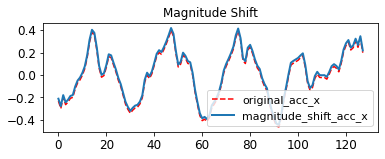

In [188]:
plt.figure(figsize=(6,2))
plt.plot(mixed, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(magnitude_shift(mixed), label="magnitude_shift_"+col,c = color_map[col], linewidth=2)
plt.legend(fontsize=11)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Magnitude Shift", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("magnitude_shift_"+col),dpi=300,tranparent=True)
plt.show()

## Time Warping

In [209]:
def time_warp(x, sigma=0.05, knot=4):
    from scipy.interpolate import CubicSpline
    orig_steps = np.arange(x.shape[0])
    
    random_warps = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, x.shape[1]))

    warp_steps = (np.ones((x.shape[1],1))*(np.linspace(0, x.shape[0]-1., num=knot+2))).T
    
    ret = np.zeros_like(x)

    for dim in range(x.shape[1]):
        time_warp = CubicSpline(warp_steps[:,dim], warp_steps[:,dim] * random_warps[:,dim])(orig_steps)
        scale = (x.shape[0]-1)/time_warp[-1]
        ret[:,dim] = np.interp(orig_steps, np.clip(scale*time_warp, 0, x.shape[0]-1), x[:,dim]).T

    return ret


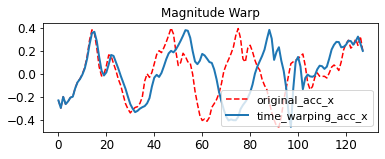

In [210]:


plt.figure(figsize=(6,2))
plt.plot(mixed, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(time_warp(mixed), label="time_warping_"+col,c = color_map[col], linewidth=2)
plt.legend(fontsize=11)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Magnitude Warp", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("Time_warp_"+col),dpi=300,tranparent=True)
plt.show()

## Window Warping

In [218]:
def window_warp(x, window_ratio_min=0.1, window_ratio_max=0.2, scales=[0.5, 2.]):
    x = np.array(x)
    # https://halshs.archives-ouvertes.fr/halshs-01357973/document
    window_ratio = np.random.uniform(window_ratio_min,window_ratio_max,1)[0]
    
    warp_scales = np.random.choice(scales, 1)
    

    warp_size = np.ceil(window_ratio*x.shape[0]).astype(int)

    window_steps = np.arange(warp_size)

    window_starts = np.random.randint(low=1, high=x.shape[0]-warp_size-1, size=1).astype(int)

    window_ends = (window_starts + warp_size).astype(int)
         
    ret = np.zeros_like(x)

    for dim in range(x.shape[1]):
        start_seg = x[:window_starts[0],dim]
        window_seg = np.interp(np.linspace(0, warp_size-1, num=int(warp_size*warp_scales[0])), window_steps, x[window_starts[0]:window_ends[0],dim])
        end_seg = x[window_ends[0]:,dim]

        warped = np.concatenate((start_seg, window_seg, end_seg))                
        ret[:,dim] = np.interp(np.arange(x.shape[0]), np.linspace(0, x.shape[0]-1., num=warped.size), warped)
    return ret

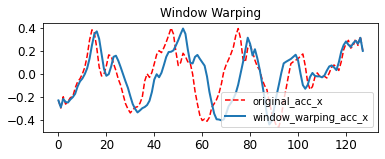

In [220]:
plt.figure(figsize=(6,2))
plt.plot(mixed, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(window_warp(mixed), label="window_warping_"+col,c = color_map[col], linewidth=2)
plt.legend(fontsize=10)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Window Warping", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("window_warping_"+col),dpi=300,tranparent=True)
plt.show()

## Window Slicing

In [223]:
def window_slice(x, reduce_ratio_min=0.85,reduce_ratio_max=0.96):
    reduce_ratio = np.random.uniform(reduce_ratio_min, reduce_ratio_max,1)[0]
    # https://halshs.archives-ouvertes.fr/halshs-01357973/document
    target_len = np.ceil(reduce_ratio*x.shape[0]).astype(int)
    
    if target_len >= x.shape[0]:
        return x

    starts = np.random.randint(low=0, high=x.shape[0]-target_len, size=(1)).astype(int)
    ends = (target_len + starts).astype(int)

    ret = np.zeros_like(x)

    for dim in range(x.shape[1]):
        ret[:,dim] = np.interp(np.linspace(0, target_len, num=x.shape[0]), np.arange(target_len), x[starts[0]:ends[0],dim])
    return ret

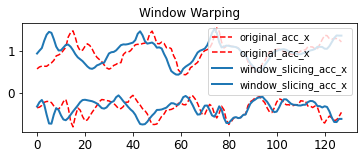

In [228]:
plt.figure(figsize=(6,2))
plt.plot(window_value_1.iloc[:,:2].values, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(window_slice(window_value_1.iloc[:,:2].values), label="window_slicing_"+col,c = color_map[col], linewidth=2)
plt.legend(fontsize=10)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Window Warping", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("window_slicing_"+col),dpi=300,tranparent=True)
plt.show()

## Random Sampling

In [258]:
import random
def random_sampling(x, reduce_ratio_min=0.85,reduce_ratio_max=0.95):
    reduce_ratio = np.random.uniform(reduce_ratio_min, reduce_ratio_max,1)[0]
    print(reduce_ratio)
    target_len = np.ceil(reduce_ratio*x.shape[0]).astype(int)
    print(target_len)
    if target_len >= x.shape[0]:
        return x

    index_list = list(np.arange(x.shape[0]))
    print(index_list)

    sampled_index = np.random.choice(x.shape[0], target_len, replace=False)
    sampled_index = sorted(sampled_index)
    print(sampled_index)


    ret = np.zeros_like(x)

    for dim in range(x.shape[1]):
        ret[:,dim] = np.interp(np.linspace(0, target_len, num=x.shape[0]), np.arange(target_len), x[sampled_index,dim])
    return ret

0.8708418498354008
112
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 12

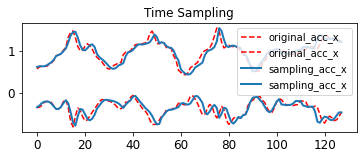

In [259]:
plt.figure(figsize=(6,2))
plt.plot(window_value_1.iloc[:,:2].values, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(random_sampling(window_value_1.iloc[:,:2].values), label="sampling_"+col,c = color_map[col], linewidth=2)
plt.legend(fontsize=10)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Time Sampling", fontsize=12)
#plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("sampling_"+col),dpi=300,tranparent=True)
plt.show()

## Slope Adding

In [45]:
def slope_adding(x):
    import random
    anchor = random.randint(0, x.shape[1])
    print(anchor)
    anchor = 80
    ret = np.zeros_like(x)
    for dim in range(x.shape[0]):
        slope = random.uniform(-0.2,0.2)
        slope = 0.3
        slope = slope/x.shape[1]
        slope = np.linspace(0, x.shape[1]-1,x.shape[1])*slope
        shift = slope[anchor]
        slope = slope -shift
        
        ret[dim,:] =   x[dim,:] + slope
    return ret

102


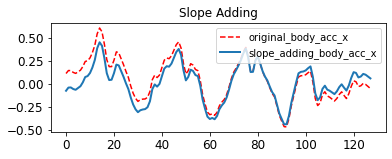

In [46]:
plt.figure(figsize=(6,2))
plt.plot(body, label="original_"+col,c = "red", linewidth=1.5,linestyle='dashed')
plt.plot(slope_adding(body.reshape(1,-1)).reshape(-1), label="slope_adding_"+col,c = color_map[col_], linewidth=2)
plt.legend(fontsize=10)
#plt.axis('off')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Slope Adding", fontsize=12)
plt.savefig(r"E:\TECO_Works\Conference\ISWC2022\images\{}.png".format("slope_adding_"+col),dpi=300,tranparent=True)
plt.show()

# Reference


1. https://arxiv.org/pdf/2002.12478.pdf
2. https://arxiv.org/pdf/2109.01081.pdf
3. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0254841
4. https://link.springer.com/content/pdf/10.1007/s11042-021-10600-0.pdf
5. https://openaccess.thecvf.com/content_CVPRW_2020/papers/w40/Cubuk_Randaugment_Practical_Automated_Data_Augmentation_With_a_Reduced_Search_Space_CVPRW_2020_paper.pdf
6. https://link.springer.com/content/pdf/10.1007/s12652-020-02865-4.pdf


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tslearn.preprocessing import TimeSeriesResampler
import pandas as pd
window = args.windowsize  



index = 1000
start_index  =  dataset.train_slidingwindows[index][1]
end_index    =  dataset.train_slidingwindows[index][2]
original_data = dataset.data_x.iloc[start_index:end_index, 1:-1]
plt.figure()
original_data.plot()

length_sample  = np.random.randint(int(0.6*window), int(0.8*window))
print(length_sample)
index_list = list(np.arange(window))
sampled_index = random.sample(index_list, length_sample)
sampled_index = sorted(sampled_index)
original_values = original_data.values
sampled_Values = original_values[sampled_index]
sample_data = pd.DataFrame(sampled_Values)
sample_data.columns = original_data.columns
plt.figure()
sample_data.plot()


resize_data = pd.DataFrame()
for col in sample_data.columns:
    ts = sample_data[col].values
    new_ts = TimeSeriesResampler(sz=window).fit_transform(ts)
    resize_data[col] = np.squeeze(new_ts)
plt.figure()
resize_data.plot()



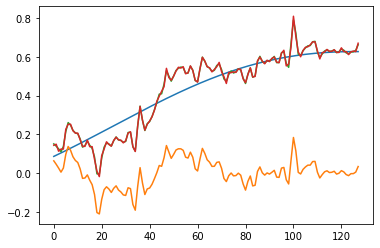

In [50]:
plt.plot(all_t_DC_component[window_start:windwow_end])
plt.plot(all_t_body_component[window_start:windwow_end])
plt.plot(all_t_DC_component[window_start:windwow_end]+all_t_body_component[window_start:windwow_end])
plt.plot(np.array(dataset.data_x[dataset.data_x["sub_id"]=="1_1"]["acc_z_1"])[window_start:windwow_end])

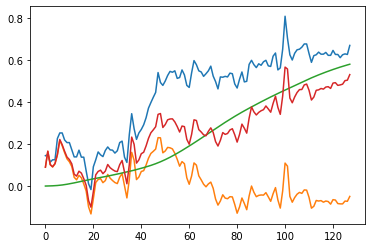

In [54]:
window_start , windwow_end = dataset.train_slidingwindows[50][1:]
window_value = dataset.data_x.iloc[window_start:windwow_end,1:-1]
acc_z_1 = window_value["acc_z_1"].values
plt.plot(acc_z_1)
y = butter_bandpass_filter(acc_z_1, 0.3, 20, 50, order=2)
y2 = butter_bandpass_filter(acc_z_1, 0.0001, 0.3, 50, order=2)
plt.plot(y)
plt.plot(y2)
plt.plot(y+y2)

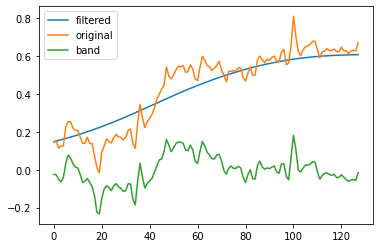

In [66]:
from scipy import signal
fc = 0.3  # Cut-off frequency of the filter
w = fc / (50 / 2) # Normalize the frequency
b, a = signal.butter(2, w, 'low')
output = signal.filtfilt(b, a, acc_z_1)



plt.plot(output, label='filtered')
plt.plot(acc_z_1, label='original')

fc1 = 0.3  # Cut-off frequency of the filter
w1 = fc1 / (50 / 2) # Normalize the frequency

fc2 = 20  # Cut-off frequency of the filter
w2 = fc2 / (50 / 2) # Normalize the frequency
b, a = signal.butter(2, [w1,w2], 'band')
output = signal.filtfilt(b, a, acc_z_1)
plt.plot(output, label='band')
plt.legend()
plt.show()

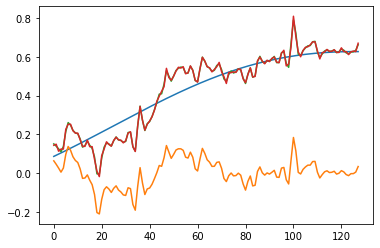

In [67]:
plt.plot(all_t_DC_component[window_start:windwow_end])
plt.plot(all_t_body_component[window_start:windwow_end])
plt.plot(all_t_DC_component[window_start:windwow_end]+all_t_body_component[window_start:windwow_end])
plt.plot(np.array(dataset.data_x[dataset.data_x["sub_id"]=="1_1"]["acc_z_1"])[window_start:windwow_end])

In [ ]:
y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)

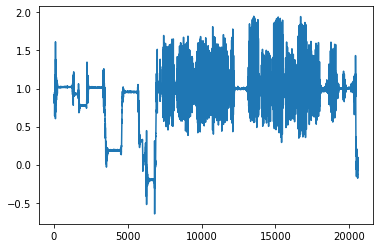

In [5]:
import math 
import numpy as np
import matplotlib.pyplot as plt
# necessary functions
from scipy.fftpack import fft,fftfreq,ifft
# Importing Scipy 
import scipy as sp
sampling_freq = 50
temp = dataset.data_x[dataset.data_x["sub_id"]=="1_1"]
acc_x_1 = temp["acc_x_1"]
plt.plot(acc_x_1)


t_signal=np.array(acc_x_1)
t_signal_length=len(t_signal) # number of points in a t_signal

# the t_signal in frequency domain after applying fft
f_signal=fft(t_signal) # 1D numpy array contains complex values (in C)

# generate frequencies associated to f_signal complex values
freqs=np.array(sp.fftpack.fftfreq(t_signal_length, d=1/float(sampling_freq))) # frequency values between [-25hz:+25hz]

In [30]:
temp = dataset.data_x[dataset.data_x["sub_id"]=="1_1"]
acc_z_1 = temp["acc_z_1"]

t_signal=np.array(acc_z_1)
t_signal_length=len(t_signal) # number of points in a t_signal

# the t_signal in frequency domain after applying fft
f_signal=fft(t_signal) # 1D numpy array contains complex values (in C)

# generate frequencies associated to f_signal complex values
freqs=np.array(sp.fftpack.fftfreq(t_signal_length, d=1/float(sampling_freq))) # frequency values between [-25hz:+25hz]

freq1=0.3
freq2 = 20
f_DC_signal=[] # DC_component in freq domain
f_body_signal=[] # body component in freq domain numpy.append(a, a[0])
f_noise_signal=[] # noise in freq domain


for i in range(len(freqs)):# iterate over all available frequencies

    # selecting the frequency value
    freq=freqs[i]

    # selecting the f_signal value associated to freq
    value= f_signal[i]

    # Selecting DC_component values 
    if abs(freq)>freq1:# testing if freq is outside DC_component frequency ranges
        f_DC_signal.append(float(0)) # add 0 to  the  list if it was the case (the value should not be added)                                       
    else: # if freq is inside DC_component frequency ranges 
        f_DC_signal.append(value) # add f_signal value to f_DC_signal list

    # Selecting noise component values 
    if (abs(freq)<=freq2):# testing if freq is outside noise frequency ranges 
        f_noise_signal.append(float(0)) # # add 0 to  f_noise_signal list if it was the case 
    else:# if freq is inside noise frequency ranges 
        f_noise_signal.append(value) # add f_signal value to f_noise_signal

    # Selecting body_component values 
    if (abs(freq)<=freq1 or abs(freq)>freq2):# testing if freq is outside Body_component frequency ranges
        f_body_signal.append(float(0))# add 0 to  f_body_signal list
    else:# if freq is inside Body_component frequency ranges
        f_body_signal.append(value) # add f_signal value to f_body_signal list
all_t_DC_component= ifft(np.array(f_DC_signal)).real
all_t_body_component= ifft(np.array(f_body_signal)).real

In [26]:
window_start , windwow_end = dataset.train_slidingwindows[50][1:]
window_value = dataset.data_x.iloc[window_start:windwow_end,1:-1]
acc_z_1 = window_value["acc_z_1"]

t_signal=np.array(acc_z_1)
t_signal_length=len(t_signal) # number of points in a t_signal

# the t_signal in frequency domain after applying fft
f_signal=fft(t_signal) # 1D numpy array contains complex values (in C)

# generate frequencies associated to f_signal complex values
freqs=np.array(sp.fftpack.fftfreq(t_signal_length, d=1/float(sampling_freq))) # frequency values between [-25hz:+25hz]

freq1=0.9
freq2 = 20
f_DC_signal=[] # DC_component in freq domain
f_body_signal=[] # body component in freq domain numpy.append(a, a[0])
f_noise_signal=[] # noise in freq domain


for i in range(len(freqs)):# iterate over all available frequencies

    # selecting the frequency value
    freq=freqs[i]

    # selecting the f_signal value associated to freq
    value= f_signal[i]

    # Selecting DC_component values 
    if abs(freq)>freq1:# testing if freq is outside DC_component frequency ranges
        f_DC_signal.append(float(0)) # add 0 to  the  list if it was the case (the value should not be added)                                       
    else: # if freq is inside DC_component frequency ranges 
        f_DC_signal.append(value) # add f_signal value to f_DC_signal list

    # Selecting noise component values 
    if (abs(freq)<=freq2):# testing if freq is outside noise frequency ranges 
        f_noise_signal.append(float(0)) # # add 0 to  f_noise_signal list if it was the case 
    else:# if freq is inside noise frequency ranges 
        f_noise_signal.append(value) # add f_signal value to f_noise_signal

    # Selecting body_component values 
    if (abs(freq)<=freq1 or abs(freq)>freq2):# testing if freq is outside Body_component frequency ranges
        f_body_signal.append(float(0))# add 0 to  f_body_signal list
    else:# if freq is inside Body_component frequency ranges
        f_body_signal.append(value) # add f_signal value to f_body_signal list
window_t_DC_component= ifft(np.array(f_DC_signal)).real
window_t_body_component= ifft(np.array(f_body_signal)).real

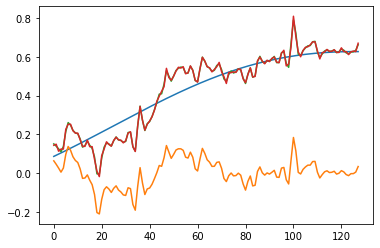

In [27]:
plt.plot(all_t_DC_component[window_start:windwow_end])
plt.plot(all_t_body_component[window_start:windwow_end])
plt.plot(all_t_DC_component[window_start:windwow_end]+all_t_body_component[window_start:windwow_end])
plt.plot(np.array(dataset.data_x[dataset.data_x["sub_id"]=="1_1"]["acc_z_1"])[window_start:windwow_end])

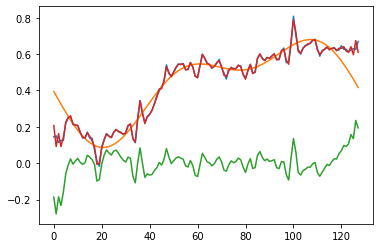

In [28]:
plt.plot(t_signal)
plt.plot(window_t_DC_component)
plt.plot(window_t_body_component)
plt.plot(window_t_body_component+window_t_DC_component)

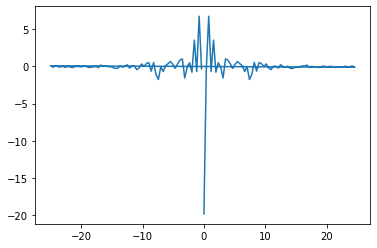

In [28]:
plt.plot(freqs,f_signal)

# Data Augmentation Draft To Delete

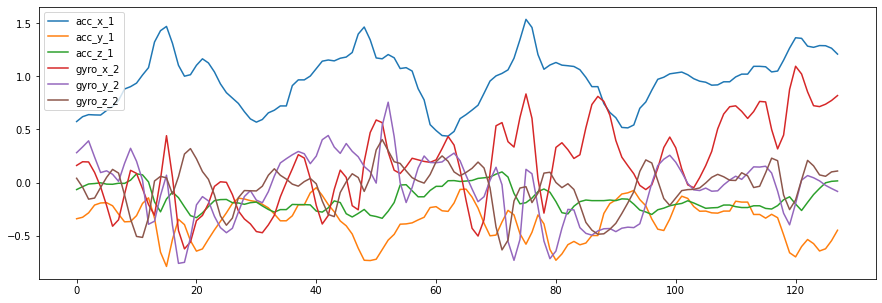

In [58]:
index = 1000
start_index  =  dataset.train_slidingwindows[index][1]
end_index    =  dataset.train_slidingwindows[index][2]
original_data = dataset.data_x.iloc[start_index:end_index, 1:-1].reset_index(drop=True)

original_data.plot(figsize=(15,5))
plt.show()

## Magnitude scaling

In [91]:
def scaling(x, sigma=0.2):
    # https://arxiv.org/pdf/1706.00527.pdf
    factor = np.random.normal(loc=1., scale=sigma, size=(x.shape[1]))
    return np.multiply(x, factor[np.newaxis,:])

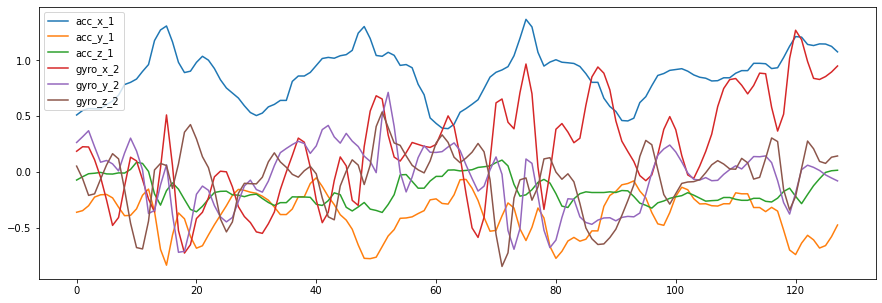

In [98]:
scaled_data = pd.DataFrame(scaling(original_data.values), columns  = original_data.columns)
scaled_data.plot(figsize=(15,5))
plt.show()

## Mantitute Wrap

In [166]:
def magnitude_warp(x, sigma=0.1, knot=6):
    from scipy.interpolate import CubicSpline
    orig_steps = np.arange(x.shape[0])
    
    random_warps = np.random.normal(loc=1.0, scale=sigma, size=( knot, x.shape[1]))

    warp_steps = (np.ones((x.shape[1],1))*(np.linspace(0, x.shape[0]-1., num=knot))).T


    warper = np.array([CubicSpline(warp_steps[:,dim], random_warps[:,dim])(orig_steps) for dim in range(x.shape[1])]).T

    ret = x * warper
    plt.plot(warper)

    return ret

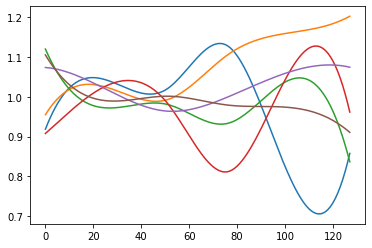

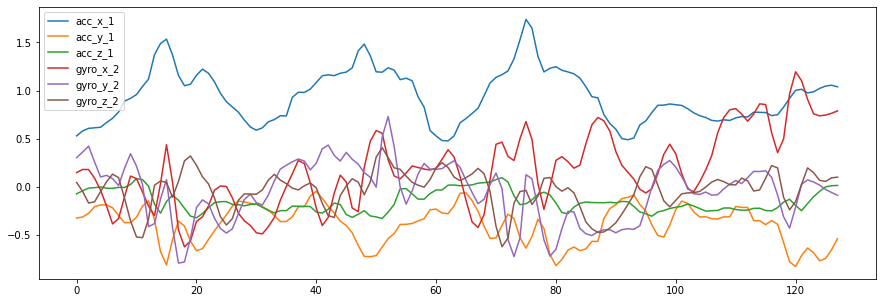

In [167]:
magnitude_warp_data = pd.DataFrame(magnitude_warp(original_data.values), columns  = original_data.columns)
magnitude_warp_data.plot(figsize=(15,5))
plt.show()

<AxesSubplot:>

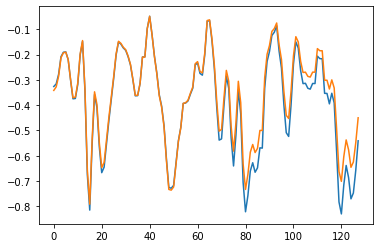

In [169]:
magnitude_warp_data["acc_y_1"].plot()
original_data["acc_y_1"].plot()

## Window Warping (WW)

The last data augmentation technique we use is more time-series specific. It consists in warping a randomly selected slice of a time series by speeding it up or down, as shown in Fig. 2. The size of the original slice is a parameter of this method. Fig. 2 shows a time series from the “ECG200” dataset and corresponding transformed data. Note that this method generates input time series of different lengths. To deal with this issue, we perform window slicing on transformed time series for all to have equal length. In this paper, we only consider warping ratios equal to 0.5 or 2, but other ratios could be used and the optimal ratio could even be fine tuned through cross-validation on the training set. In the following, this method will be referred to as window warping (WW).

19       0.5


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

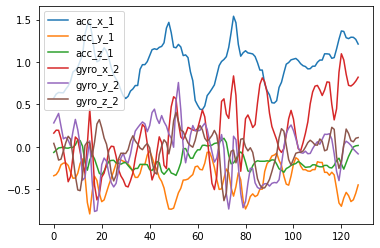

<Figure size 432x288 with 0 Axes>

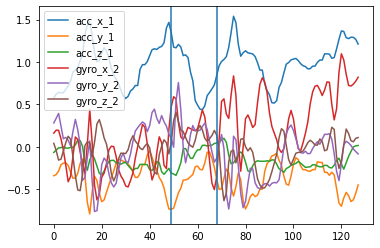

<Figure size 432x288 with 0 Axes>

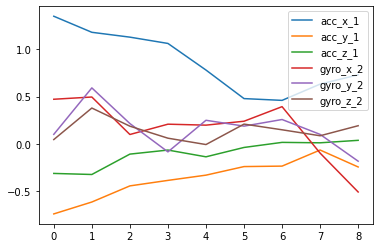

<Figure size 432x288 with 0 Axes>

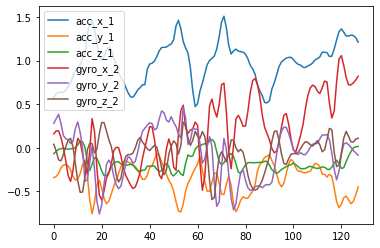

In [51]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tslearn.preprocessing import TimeSeriesResampler
import pandas as pd
window = args.windowsize  



index = 1000
start_index  =  dataset.train_slidingwindows[index][1]
end_index    =  dataset.train_slidingwindows[index][2]
original_data = dataset.data_x.iloc[start_index:end_index, 1:-1].reset_index(drop=True)
plt.figure()
original_data.plot()

length_sample  = np.random.randint(int(0.1*window), int(0.2*window))
p = random.uniform(0, 1)
if p >= 0.5:
    ratio = 2
else:
    ratio = 0.5

print(length_sample, "     ", ratio)

sample_start_index = np.random.randint(start_index, start_index+window-length_sample)
sample_end_index   = sample_start_index + length_sample

original_data = dataset.data_x.iloc[start_index:end_index, 1:-1].reset_index(drop=True)
plt.figure()
original_data.plot()
plt.axvline(x=sample_start_index-start_index)
plt.axvline(x=sample_end_index-start_index)


vor_sample    = dataset.data_x.iloc[start_index:sample_start_index, 1:-1]
wraped_sample = dataset.data_x.iloc[sample_start_index:sample_end_index, 1:-1]
nach_sample   = dataset.data_x.iloc[sample_end_index:end_index, 1:-1]

resize_length_sample = int(length_sample*ratio)

resize_data = pd.DataFrame()
for col in wraped_sample.columns:
    ts = wraped_sample[col].values
    new_ts = TimeSeriesResampler(sz=resize_length_sample).fit_transform(ts)
    resize_data[col] = np.squeeze(new_ts)

plt.figure()
resize_data.plot()

all_data = pd.concat([vor_sample,resize_data,nach_sample])
sample_data = pd.DataFrame()
for col in all_data.columns:
    ts = all_data[col].values
    new_ts = TimeSeriesResampler(sz=window).fit_transform(ts)
    sample_data[col] = np.squeeze(new_ts)

plt.figure()
sample_data.plot()

16       1.5
12       0.75


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

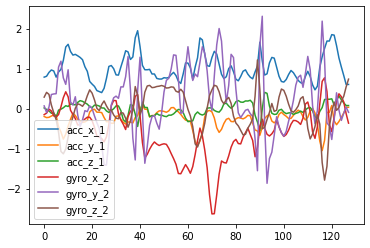

<Figure size 432x288 with 0 Axes>

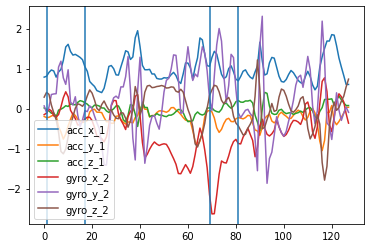

<Figure size 432x288 with 0 Axes>

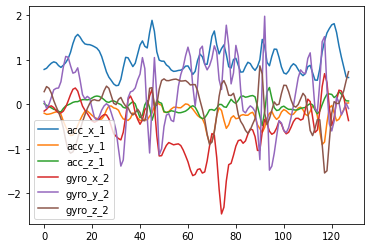

In [54]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tslearn.preprocessing import TimeSeriesResampler
import pandas as pd
window = args.windowsize  



index = 200
start_index  =  dataset.train_slidingwindows[index][1]
end_index    =  dataset.train_slidingwindows[index][2]
original_data = dataset.data_x.iloc[start_index:end_index, 1:-1].reset_index(drop=True)
plt.figure()
original_data.plot()


window_data = original_data.copy()
number_of_wrap = np.random.randint(1,4)
index_lists = []
for _ in range(number_of_wrap):

    length_sample  = np.random.randint(int(0.1*window), int(0.15*window))
    p = random.uniform(0, 1)
    if p >= 0.5:
        ratio = 1.5
    else:
        ratio = 0.75

    print(length_sample, "     ", ratio)
    resize_length_sample = int(length_sample*ratio)
    
    sample_start_index = np.random.randint(0, 0+window-length_sample)
    sample_end_index   = sample_start_index + length_sample


    index_lists.append((sample_start_index-0,sample_end_index-0 ))



    vor_sample    = window_data.iloc[0:sample_start_index, :]
    wraped_sample = window_data.iloc[sample_start_index:sample_end_index, :]
    nach_sample   = window_data.iloc[sample_end_index:,:]



    resize_data = pd.DataFrame()
    for col in wraped_sample.columns:
        ts = wraped_sample[col].values
        new_ts = TimeSeriesResampler(sz=resize_length_sample).fit_transform(ts)
        resize_data[col] = np.squeeze(new_ts)
    all_data = pd.concat([vor_sample,resize_data,nach_sample])
    
    
    sample_data = pd.DataFrame()
    for col in all_data.columns:
        ts = all_data[col].values
        new_ts = TimeSeriesResampler(sz=window).fit_transform(ts)
        sample_data[col] = np.squeeze(new_ts)
        
    window_data = sample_data.copy()

    
plt.figure()
original_data.plot()
for sample_start_index,sample_end_index in index_lists:
    plt.axvline(x=sample_start_index)
    plt.axvline(x=sample_end_index)    

plt.figure()
window_data.plot()

## Ramdom Sampling

98


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

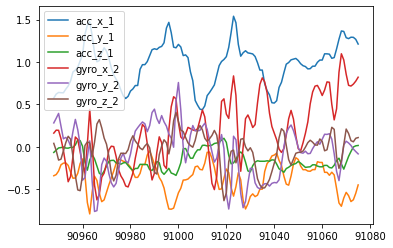

<Figure size 432x288 with 0 Axes>

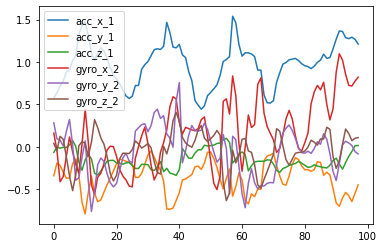

<Figure size 432x288 with 0 Axes>

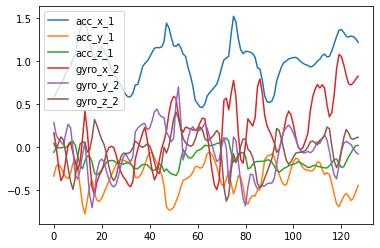

In [170]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tslearn.preprocessing import TimeSeriesResampler
import pandas as pd
window = args.windowsize  



index = 1000
start_index  =  dataset.train_slidingwindows[index][1]
end_index    =  dataset.train_slidingwindows[index][2]
original_data = dataset.data_x.iloc[start_index:end_index, 1:-1]
plt.figure()
original_data.plot()

length_sample  = np.random.randint(int(0.6*window), int(0.8*window))
print(length_sample)
index_list = list(np.arange(window))
sampled_index = random.sample(index_list, length_sample)
sampled_index = sorted(sampled_index)
original_values = original_data.values
sampled_Values = original_values[sampled_index]
sample_data = pd.DataFrame(sampled_Values)
sample_data.columns = original_data.columns
plt.figure()
sample_data.plot()


resize_data = pd.DataFrame()
for col in sample_data.columns:
    ts = sample_data[col].values
    new_ts = TimeSeriesResampler(sz=window).fit_transform(ts)
    resize_data[col] = np.squeeze(new_ts)
plt.figure()
resize_data.plot()



## Time Wrap

In [ ]:
np.clip(scale*time_warp, 0, x.shape[0]-1)

In [192]:
warp_steps[:,1] * random_warps[:,1]

array([  0.        ,  12.65499073,  66.78220807,  42.25802657,
        91.98760328, 103.59082009])

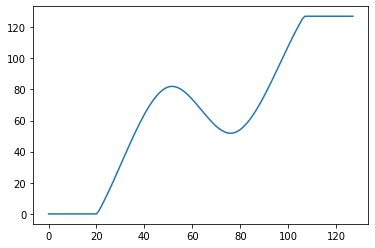

In [190]:
from scipy.interpolate import CubicSpline
orig_steps = np.arange(128)
sigma = 0.2
knot = 4
random_warps = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, 6))

warp_steps = (np.ones((6,1))*(np.linspace(0, 128-1., num=knot+2))).T

time_warp = CubicSpline(warp_steps[:,1], warp_steps[:,1] * random_warps[:,1])(orig_steps)

scale = (128-1)/time_warp[-1]

plt.plot(np.clip(scale*time_warp, 0, 128-1))

In [ ]:
time_warp = CubicSpline(warp_steps[:,dim], warp_steps[:,dim] * random_warps[:,dim])(orig_steps)

In [271]:
def time_warp(x, sigma=0.07, knot=5):
    from scipy.interpolate import CubicSpline
    orig_steps = np.arange(x.shape[0])
    
    random_warps = np.random.normal(loc=1.0, scale=sigma, size=(knot+2))
    #plt.plot(random_warps)
    warp_steps = (np.ones((x.shape[1],1))*(np.linspace(0, x.shape[0]-1., num=knot+2))).T
    
    ret = np.zeros_like(x)

    for dim in range(x.shape[1]):
        time_warp = CubicSpline(warp_steps[:,dim], warp_steps[:,dim] * random_warps)(orig_steps)
        #plt.figure()
        #plt.plot(time_warp)
        scale = (x.shape[0]-1)/time_warp[-1]
        ret[:,dim] = np.interp(orig_steps, np.clip(scale*time_warp, 0, x.shape[0]-1), x[:,dim]).T
    return ret

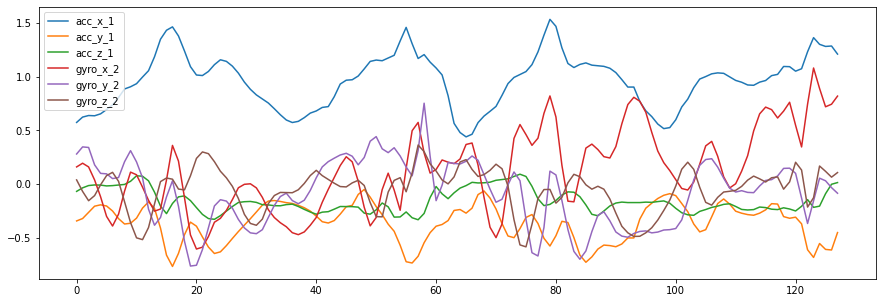

In [282]:
def time_warp(x, sigma=0.07, knot=5):
    from scipy.interpolate import CubicSpline
    orig_steps = np.arange(x.shape[0])
    
    random_warps = np.random.normal(loc=1.0, scale=sigma, size=(knot+2))
    #plt.plot(random_warps)
    warp_steps = (np.ones((x.shape[1],1))*(np.linspace(0, x.shape[0]-1., num=knot+2))).T
    
    ret = np.zeros_like(x)

    for dim in range(x.shape[1]):
        time_warp = CubicSpline(warp_steps[:,dim], warp_steps[:,dim] * random_warps)(orig_steps)
        #plt.figure()
        #plt.plot(time_warp)
        scale = (x.shape[0]-1)/time_warp[-1]
        ret[:,dim] = np.interp(orig_steps, np.clip(scale*time_warp, 0, x.shape[0]-1), x[:,dim]).T
    return ret
time_wrap_data = pd.DataFrame(time_warp(original_data.values), columns  = original_data.columns)
time_wrap_data.plot(figsize=(15,5))
plt.show()

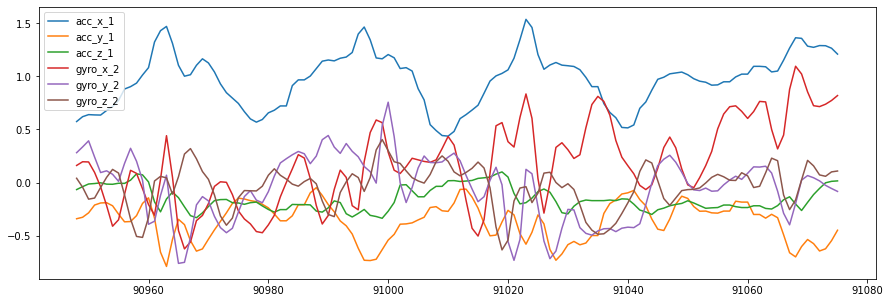

In [244]:
original_data.plot(figsize=(15,5))
plt.show()

## Crop (window Slicing)|

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

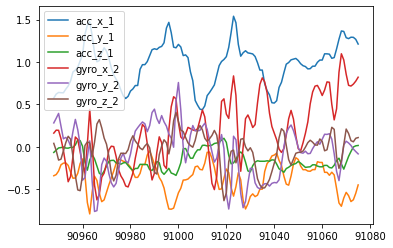

<Figure size 432x288 with 0 Axes>

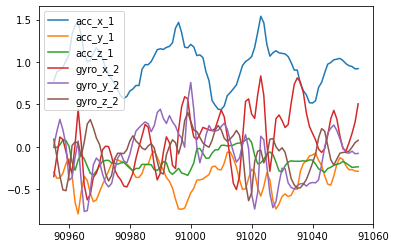

<Figure size 432x288 with 0 Axes>

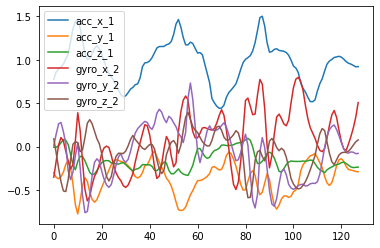

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from tslearn.preprocessing import TimeSeriesResampler
import pandas as pd
window = args.windowsize  



index = 1000
start_index  =  dataset.train_slidingwindows[index][1]
end_index    =  dataset.train_slidingwindows[index][2]
original_data = dataset.data_x.iloc[start_index:end_index, 1:-1]
plt.figure()
original_data.plot()

length_sample  = np.random.randint(int(0.6*window), int(0.9*window))
sample_start_index = np.random.randint(start_index, start_index+window-length_sample)
sample_end_index  = sample_start_index+length_sample
sample_data = dataset.data_x.iloc[sample_start_index:sample_end_index, 1:-1]
plt.figure()
sample_data.plot()


resize_data = pd.DataFrame()
for col in sample_data.columns:
    ts = sample_data[col].values
    new_ts = TimeSeriesResampler(sz=window).fit_transform(ts)
    resize_data[col] = np.squeeze(new_ts)
plt.figure()
resize_data.plot()

## Scale

165


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

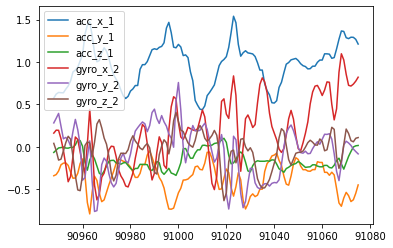

<Figure size 432x288 with 0 Axes>

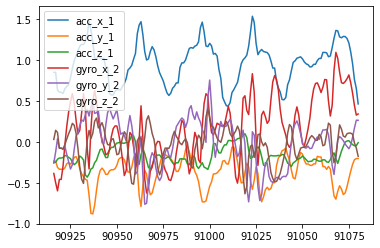

<Figure size 432x288 with 0 Axes>

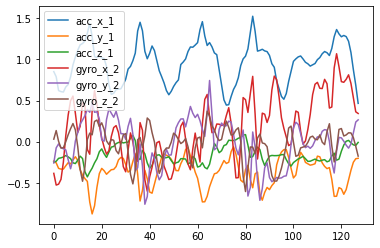

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from tslearn.preprocessing import TimeSeriesResampler
import pandas as pd
window = args.windowsize  
augmentation_window = int(0.25*window)


index = 1000
start_index  =  dataset.train_slidingwindows[index][1]
end_index    =  dataset.train_slidingwindows[index][2]
original_data = dataset.data_x.iloc[start_index:end_index, 1:-1]
plt.figure()
original_data.plot()


sample_start_index = max(0,np.random.randint(start_index-augmentation_window, start_index))
sample_end_index =  min(dataset.data_x.shape[0],np.random.randint(end_index, end_index+augmentation_window))
sample_data = dataset.data_x.iloc[sample_start_index:sample_end_index, 1:-1]
print(sample_end_index-sample_start_index)
plt.figure()
sample_data.plot()


resize_data = pd.DataFrame()
for col in sample_data.columns:
    ts = sample_data[col].values
    new_ts = TimeSeriesResampler(sz=window).fit_transform(ts)
    resize_data[col] = np.squeeze(new_ts)
plt.figure()
resize_data.plot()

In [13]:
index = 1000
start_index  =  dataset.train_slidingwindows[index][1]
end_index    =  dataset.train_slidingwindows[index][2]
data = dataset.data_x.iloc[start_index:end_index, 1:-1]
plt.figure()
data.plot()

NameError: name 'plt' is not defined

In [6]:
from tslearn.preprocessing import TimeSeriesResampler
ts = np.arange(5)
new_ts = TimeSeriesResampler(sz=9).fit_transform(ts)
final_ts = np.squeeze(new_ts)
print(ts)   # [0 1 2 3 4]
print(new_ts)  # [[[0. ] [0.5] [1. ] [1.5] [2. ] [2.5] [3. ] [3.5] [4. ]]]
print(final_ts)  # [0. 0.5 1. 1.5 2. 2.5 3. 3.5 4.]

[0 1 2 3 4]
[[[0. ]
  [0.5]
  [1. ]
  [1.5]
  [2. ]
  [2.5]
  [3. ]
  [3.5]
  [4. ]]]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]


In [12]:
from time import time

ts = np.arange(5000)
start = time()

new_ts = TimeSeriesResampler(sz=10000).fit_transform(ts)
final_ts = np.squeeze(new_ts)
end = time()
print(end-start)
print(ts)   # [0 1 2 3 4]
print(new_ts)  # [[[0. ] [0.5] [1. ] [1.5] [2. ] [2.5] [3. ] [3.5] [4. ]]]
print(final_ts)  # [0. 0.5 1. 1.5 2. 2.5 3. 3.5 4.]

0.0009915828704833984
[   0    1    2 ... 4997 4998 4999]
[[[0.00000000e+00]
  [4.99949995e-01]
  [9.99899990e-01]
  ...
  [4.99800010e+03]
  [4.99850005e+03]
  [4.99900000e+03]]]
[0.00000000e+00 4.99949995e-01 9.99899990e-01 ... 4.99800010e+03
 4.99850005e+03 4.99900000e+03]


In [31]:
data = dataset.data_x.set_index('sub_id').copy()
        columns = data.columns[:-1]
        groups = {}
        for col in columns:
            index = col.split("_")[-1]
            if index in groups.keys():
                groups[index].append(col)
            else:
                groups[index] = [col]

        index = 1
        columns_mapping = {}
        for key in groups.keys():
            cols = groups[key]
            cols_set = []
            for col in cols:
                cols_set.append(col.split("_")[0])
            cols_set = set(cols_set)
            for col_begin in cols_set:
                for col in cols:
                    if col.split("_")[0]==col_begin:
                        columns_mapping[col] = col[:-2]+"_"+str(index)
                index= index+1

        columns = [columns_mapping[col] for col in data.columns[:-1]] + ["sub"]
        data.columns = columns

In [5]:
columns

NameError: name 'columns' is not defined

In [32]:
#data = dataset.data_x.set_index('sub_id').copy()
data

acc_x_2   acc_y_2   acc_z_2  diff_acc_x_3  diff_acc_y_3  \
sub_id                                                             
1_1     0.390029 -0.219739 -0.161668     -0.006944      0.019444   
1_1     0.549041 -0.323713 -0.223046     -0.006944      0.019444   
1_1     0.368536 -0.203470 -0.159361     -0.029167      0.006944   
1_1     0.445051 -0.269136 -0.211633      0.000000      0.000000   
1_1     0.398665 -0.241334 -0.183720     -0.002778     -0.013889   
...          ...       ...       ...           ...           ...   
30_61   0.040389  0.208158  0.017585     -0.001389      0.018056   
30_61   0.074591  0.228987  0.019099      0.000000      0.000000   
30_61   0.083070  0.187067  0.009945      0.043056     -0.008333   
30_61   0.129741  0.255474 -0.050437     -0.001389      0.009722   
30_61   0.100742  0.174698 -0.107915      0.004167     -0.018056   

        diff_acc_z_3  diff_gyro_x_4  diff_gyro_y_4  diff_gyro_z_4  \
sub_id                                                              
1_1         0.027778       0.042455       0.088881      -0.007636   
1_1         0.027778       0.042455       0.088881      -0.007636   
1_1        -0.023611      -0.010996       0.257174       0.044899   
1_1         0.000000      -0.069944       0.091324      -0.005192   
1_1        -0.008333      -0.030849       0.109039      -0.024129   
...              ...            ...            ...            ...   
30_61       0.151389      -0.553138      -0.541227       0.064141   
30_61       0.000000       0.296270       0.224493       0.001527   
30_61      -0.016667       0.589790       0.235794       0.009774   
30_61      -0.022222       0.542754       0.084910       0.089492   
30_61      -0.095833       0.065363      -0.085216       0.012828   

        grav_acc_x_1  grav_acc_y_1  grav_acc_z_1  gyro_x_5  gyro_y_5  \
sub_id                                                                 
1_1         0.432648      0.176403      0.720683 -0.013726 -0.238178   
1_1         0.443978      0.169720      0.714915 -0.037929 -0.178095   
1_1         0.455268      0.163014      0.709100  0.014601  0.102821   
1_1         0.466513      0.156288      0.703239 -0.076276  0.184696   
1_1         0.477710      0.149544      0.697330 -0.090396  0.312366   
...              ...           ...           ...       ...       ...   
30_61       0.378595      0.289740      0.897164 -1.157026 -0.969183   
30_61       0.373686      0.286057      0.903124 -0.982608 -0.926986   
30_61       0.368826      0.282359      0.909041 -0.284301 -0.486244   
30_61       0.364020      0.278649      0.914908  0.198656 -0.572909   
30_61       0.359272      0.274927      0.920720  0.280969 -0.528669   

        gyro_z_5  sub  
sub_id                 
1_1    -0.340682    1  
1_1    -0.397669    1  
1_1    -0.319634    1  
1_1    -0.336631    1  
1_1    -0.361742    1  
...          ...  ...  
30_61  -0.055706   30  
30_61  -0.068404   30  
30_61  -0.028968   30  
30_61   0.042378   30  
30_61   0.086468   30  

[1122772 rows x 16 columns]

<AxesSubplot:xlabel='sub_id'>

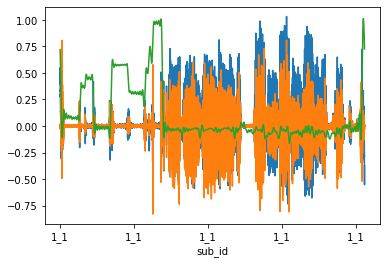

In [10]:
data = dataset.data_x.set_index('sub_id').copy()
data.loc["1_1","acc_x_1"].plot()
data.loc["1_1","diff_acc_x_1"].plot()
data.loc["1_1","grav_acc_z_1"].plot()

In [8]:
data.columns

Index(['acc_x_1', 'acc_y_1', 'acc_z_1', 'diff_acc_x_1', 'diff_acc_y_1',
       'diff_acc_z_1', 'diff_gyro_x_2', 'diff_gyro_y_2', 'diff_gyro_z_2',
       'grav_acc_x_1', 'grav_acc_y_1', 'grav_acc_z_1', 'gyro_x_2', 'gyro_y_2',
       'gyro_z_2', 'sub'],
      dtype='object')

In [5]:
dataset.data_x

sub_id   acc_x_1   acc_y_1   acc_z_1  gyro_x_2  gyro_y_2  gyro_z_2  \
0          1_1  0.918056 -0.112500  0.509722 -0.054978 -0.069639 -0.030849   
1          1_1  0.911111 -0.093056  0.537500 -0.012523  0.019242 -0.038485   
2          1_1  0.881944 -0.086111  0.513889 -0.023518  0.276417  0.006414   
3          1_1  0.881944 -0.086111  0.513889 -0.093462  0.367741  0.001222   
4          1_1  0.879167 -0.100000  0.505556 -0.124311  0.476780 -0.022907   
...        ...       ...       ...       ...       ...       ...       ...   
1122767  30_61  0.430556  0.501389  0.923611 -1.154535 -0.653931  0.004276   
1122768  30_61  0.430556  0.501389  0.923611 -0.858266 -0.429438  0.005803   
1122769  30_61  0.473611  0.493056  0.906944 -0.268475 -0.193644  0.015577   
1122770  30_61  0.472222  0.502778  0.884722  0.274278 -0.108734  0.105069   
1122771  30_61  0.476389  0.484722  0.788889  0.339641 -0.193950  0.117897   

         sub  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
1122767   30  
1122768   30  
1122769   30  
1122770   30  
1122771   30  

[1122772 rows x 8 columns]

In [6]:
data

NameError: name 'data' is not defined

In [62]:
col_names = list(dataset.data_x.columns)[1:-1]

In [10]:
import pandas as pd

In [67]:
dataset.data_x#["sub_id"].unique()

data = dataset.data_x.set_index('sub_id').copy()
sensor_cols = data.columns[:-1]


filtered_data = []
for sub_id in data.index.unique():
    temp = data.loc[sub_id,sensor_cols]
    filtered_temp = pd.DataFrame()

    for col in temp.columns:
        t_signal=np.array(temp[col]) # copie the signal values in 1D numpy array

        if 'acc' in col: 
            # the 2nd output DC_component is the gravity_acc
            # The 3rd one is the body_component which in this case the body_acc
            _,grav_acc,body_acc,_=components_selection_one_signal(t_signal,freq1,freq2) # apply components selection

            filtered_temp[col]=body_acc
            filtered_temp['grav_'+col]= grav_acc
        
        elif 'gyro' in col: 
            
            # The 3rd output of components_selection is the body_component which in this case the body_gyro component
            _,_,body_gyro,_=components_selection_one_signal(t_signal,freq1,freq2)  # apply components selection
            filtered_temp[col]=body_gyro # t_body_acc storing with the appropriate axis selected 
    filtered_temp = filtered_temp[sorted(list(filtered_temp.columns))]
    filtered_temp.index = temp.index
    filtered_data.append(filtered_temp)
    
filtered_data = pd.concat(filtered_data)
filtered_data = pd.concat([filtered_data, data.iloc[:,-1]], axis=1)

In [68]:
filtered_data

acc_x_1   acc_y_1   acc_z_1  grav_acc_x_1  grav_acc_y_1  \
sub_id                                                             
1_1     0.390029 -0.219739 -0.161668      0.432648      0.176403   
1_1     0.549041 -0.323713 -0.223046      0.443978      0.169720   
1_1     0.368536 -0.203470 -0.159361      0.455268      0.163014   
1_1     0.445051 -0.269136 -0.211633      0.466513      0.156288   
1_1     0.398665 -0.241334 -0.183720      0.477710      0.149544   
...          ...       ...       ...           ...           ...   
30_61   0.040389  0.208158  0.017585      0.378595      0.289740   
30_61   0.074591  0.228987  0.019099      0.373686      0.286057   
30_61   0.083070  0.187067  0.009945      0.368826      0.282359   
30_61   0.129741  0.255474 -0.050437      0.364020      0.278649   
30_61   0.100742  0.174698 -0.107915      0.359272      0.274927   

        grav_acc_z_1  gyro_x_2  gyro_y_2  gyro_z_2  sub  
sub_id                                                   
1_1         0.720683 -0.013726 -0.238178 -0.340682    1  
1_1         0.714915 -0.037929 -0.178095 -0.397669    1  
1_1         0.709100  0.014601  0.102821 -0.319634    1  
1_1         0.703239 -0.076276  0.184696 -0.336631    1  
1_1         0.697330 -0.090396  0.312366 -0.361742    1  
...              ...       ...       ...       ...  ...  
30_61       0.897164 -1.157026 -0.969183 -0.055706   30  
30_61       0.903124 -0.982608 -0.926986 -0.068404   30  
30_61       0.909041 -0.284301 -0.486244 -0.028968   30  
30_61       0.914908  0.198656 -0.572909  0.042378   30  
30_61       0.920720  0.280969 -0.528669  0.086468   30  

[1122772 rows x 10 columns]

<AxesSubplot:xlabel='sub_id'>

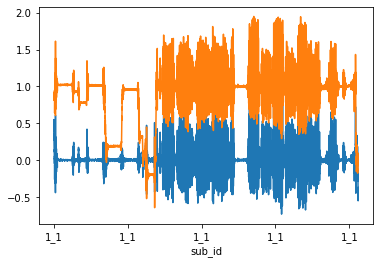

In [51]:
filtered_data.loc["1_1","acc_x_1"].plot()
data.loc["1_1","acc_x_1"].plot()

<AxesSubplot:xlabel='sub_id'>

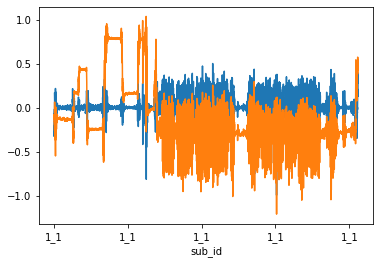

In [57]:
filtered_data.loc["1_1","acc_y_1"].plot()
data.loc["1_1","acc_y_1"].plot()

<AxesSubplot:xlabel='sub_id'>

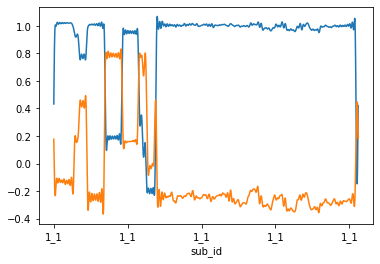

In [56]:
filtered_data.loc["1_1","grav_acc_x_1"].plot()
filtered_data.loc["1_1","grav_acc_y_1"].plot()
#data.loc["1_1","grav_acc_x_1"].plot()

In [72]:
filtered_data

acc_x_1   acc_y_1   acc_z_1  grav_acc_x_1  grav_acc_y_1  \
sub_id                                                             
1_1     0.390029 -0.219739 -0.161668      0.432648      0.176403   
1_1     0.549041 -0.323713 -0.223046      0.443978      0.169720   
1_1     0.368536 -0.203470 -0.159361      0.455268      0.163014   
1_1     0.445051 -0.269136 -0.211633      0.466513      0.156288   
1_1     0.398665 -0.241334 -0.183720      0.477710      0.149544   
...          ...       ...       ...           ...           ...   
30_61   0.040389  0.208158  0.017585      0.378595      0.289740   
30_61   0.074591  0.228987  0.019099      0.373686      0.286057   
30_61   0.083070  0.187067  0.009945      0.368826      0.282359   
30_61   0.129741  0.255474 -0.050437      0.364020      0.278649   
30_61   0.100742  0.174698 -0.107915      0.359272      0.274927   

        grav_acc_z_1  gyro_x_2  gyro_y_2  gyro_z_2  sub  
sub_id                                                   
1_1         0.720683 -0.013726 -0.238178 -0.340682    1  
1_1         0.714915 -0.037929 -0.178095 -0.397669    1  
1_1         0.709100  0.014601  0.102821 -0.319634    1  
1_1         0.703239 -0.076276  0.184696 -0.336631    1  
1_1         0.697330 -0.090396  0.312366 -0.361742    1  
...              ...       ...       ...       ...  ...  
30_61       0.897164 -1.157026 -0.969183 -0.055706   30  
30_61       0.903124 -0.982608 -0.926986 -0.068404   30  
30_61       0.909041 -0.284301 -0.486244 -0.028968   30  
30_61       0.914908  0.198656 -0.572909  0.042378   30  
30_61       0.920720  0.280969 -0.528669  0.086468   30  

[1122772 rows x 10 columns]

In [74]:

columns = ["diff_"+i for i in col_names]

# Train_vali_diff
diff_data = []
for id in temp.index.unique():
    diff_data.append(filtered_data.loc[id,sensor_cols].diff())
diff_data = pd.concat(diff_data)

diff_data.columns = columns
diff_data.fillna(method ="backfill",inplace=True)
temp = pd.concat([filtered_data.iloc[:,:-1],  diff_data, filtered_data.iloc[:,-1]], axis=1)

In [75]:
temp

acc_x_1   acc_y_1   acc_z_1  grav_acc_x_1  grav_acc_y_1  \
sub_id                                                             
1_1     0.390029 -0.219739 -0.161668      0.432648      0.176403   
1_1     0.549041 -0.323713 -0.223046      0.443978      0.169720   
1_1     0.368536 -0.203470 -0.159361      0.455268      0.163014   
1_1     0.445051 -0.269136 -0.211633      0.466513      0.156288   
1_1     0.398665 -0.241334 -0.183720      0.477710      0.149544   
...          ...       ...       ...           ...           ...   
30_61   0.040389  0.208158  0.017585      0.378595      0.289740   
30_61   0.074591  0.228987  0.019099      0.373686      0.286057   
30_61   0.083070  0.187067  0.009945      0.368826      0.282359   
30_61   0.129741  0.255474 -0.050437      0.364020      0.278649   
30_61   0.100742  0.174698 -0.107915      0.359272      0.274927   

        grav_acc_z_1  gyro_x_2  gyro_y_2  gyro_z_2  diff_acc_x_1  \
sub_id                                                             
1_1         0.720683 -0.013726 -0.238178 -0.340682      0.159013   
1_1         0.714915 -0.037929 -0.178095 -0.397669      0.159013   
1_1         0.709100  0.014601  0.102821 -0.319634     -0.180505   
1_1         0.703239 -0.076276  0.184696 -0.336631      0.076515   
1_1         0.697330 -0.090396  0.312366 -0.361742     -0.046386   
...              ...       ...       ...       ...           ...   
30_61       0.897164 -1.157026 -0.969183 -0.055706     -0.013753   
30_61       0.903124 -0.982608 -0.926986 -0.068404      0.034202   
30_61       0.909041 -0.284301 -0.486244 -0.028968      0.008479   
30_61       0.914908  0.198656 -0.572909  0.042378      0.046671   
30_61       0.920720  0.280969 -0.528669  0.086468     -0.028999   

        diff_acc_y_1  diff_acc_z_1  diff_gyro_x_2  diff_gyro_y_2  \
sub_id                                                             
1_1        -0.103974     -0.061377      -0.024203       0.060083   
1_1        -0.103974     -0.061377      -0.024203       0.060083   
1_1         0.120243      0.063685       0.052529       0.280916   
1_1        -0.065667     -0.052272      -0.090877       0.081875   
1_1         0.027802      0.027914      -0.014119       0.127670   
...              ...           ...            ...            ...   
30_61       0.023212      0.120522      -0.437503      -0.410067   
30_61       0.020829      0.001514       0.174418       0.042197   
30_61      -0.041919     -0.009154       0.698307       0.440741   
30_61       0.068407     -0.060382       0.482958      -0.086664   
30_61      -0.080776     -0.057477       0.082312       0.044239   

        diff_gyro_z_2  sub  
sub_id                      
1_1         -0.056987    1  
1_1         -0.056987    1  
1_1          0.078035    1  
1_1         -0.016997    1  
1_1         -0.025111    1  
...               ...  ...  
30_61        0.085011   30  
30_61       -0.012699   30  
30_61        0.039436   30  
30_61        0.071346   30  
30_61        0.044090   30  

[1122772 rows x 16 columns]

In [16]:
# necessary functions
from scipy.fftpack import fft,fftfreq,ifft
# Importing Scipy 
import scipy as sp
freq1 = 0.3 
freq2 = 20  
sampling_freq = 50


def components_selection_one_signal(t_signal,freq1,freq2):
    """
    DC_component: f_signal values having freq between [-0.3 hz to 0 hz] and from [0 hz to 0.3hz] 
                                                                (-0.3 and 0.3 are included)
    
    noise components: f_signal values having freq between [-25 hz to 20 hz[ and from ] 20 hz to 25 hz] 
                                                                  (-25 and 25 hz inculded 20hz and -20hz not included)
    
    selecting body_component: f_signal values having freq between [-20 hz to -0.3 hz] and from [0.3 hz to 20 hz] 
                                                                  (-0.3 and 0.3 not included , -20hz and 20 hz included)
    """

    t_signal=np.array(t_signal)
    t_signal_length=len(t_signal) # number of points in a t_signal
    
    # the t_signal in frequency domain after applying fft
    f_signal=fft(t_signal) # 1D numpy array contains complex values (in C)
    
    # generate frequencies associated to f_signal complex values
    freqs=np.array(sp.fftpack.fftfreq(t_signal_length, d=1/float(sampling_freq))) # frequency values between [-25hz:+25hz]
    

    
    
    f_DC_signal=[] # DC_component in freq domain
    f_body_signal=[] # body component in freq domain numpy.append(a, a[0])
    f_noise_signal=[] # noise in freq domain
    
    for i in range(len(freqs)):# iterate over all available frequencies
        
        # selecting the frequency value
        freq=freqs[i]
        
        # selecting the f_signal value associated to freq
        value= f_signal[i]
        
        # Selecting DC_component values 
        if abs(freq)>0.3:# testing if freq is outside DC_component frequency ranges
            f_DC_signal.append(float(0)) # add 0 to  the  list if it was the case (the value should not be added)                                       
        else: # if freq is inside DC_component frequency ranges 
            f_DC_signal.append(value) # add f_signal value to f_DC_signal list
    
        # Selecting noise component values 
        if (abs(freq)<=20):# testing if freq is outside noise frequency ranges 
            f_noise_signal.append(float(0)) # # add 0 to  f_noise_signal list if it was the case 
        else:# if freq is inside noise frequency ranges 
            f_noise_signal.append(value) # add f_signal value to f_noise_signal

        # Selecting body_component values 
        if (abs(freq)<=0.3 or abs(freq)>20):# testing if freq is outside Body_component frequency ranges
            f_body_signal.append(float(0))# add 0 to  f_body_signal list
        else:# if freq is inside Body_component frequency ranges
            f_body_signal.append(value) # add f_signal value to f_body_signal list
    
    ################### Inverse the transformation of signals in freq domain ########################
    # applying the inverse fft(ifft) to signals in freq domain and put them in float format
    t_DC_component= ifft(np.array(f_DC_signal)).real
    t_body_component= ifft(np.array(f_body_signal)).real
    t_noise=ifft(np.array(f_noise_signal)).real
    
    total_component=t_signal-t_noise # extracting the total component(filtered from noise) 
                                     #  by substracting noise from t_signal (the original signal).
    

    return (total_component,t_DC_component,t_body_component,t_noise) 


In [4]:
from torch.utils.data import DataLoader
print("================ {} Mode ====================".format(dataset.exp_mode))
print("================ {} CV ======================".format(dataset.num_of_cv))
for i in range(dataset.num_of_cv):
    dataset.update_train_val_test_keys()
    train_data  = data_set(args,dataset,"train")
    test_data  = data_set(args,dataset,"test")
    vali_data  = data_set(args,dataset,"vali")
    
    
        # form the dataloader
    train_data_loader = DataLoader(train_data,  
                                    batch_size   =  args.batch_size,
                                    shuffle      =  args.shuffle,
                                    num_workers  =  0,
                                    drop_last    =  args.drop_last)

    vali_data_loader = DataLoader(vali_data,  
                                    batch_size   =  args.batch_size,
                                    shuffle      =  args.shuffle,
                                    num_workers  =  0,
                                    drop_last    =  args.drop_last)

    test_data_loader = DataLoader(test_data,  
                                    batch_size   =  args.batch_size,
                                    shuffle      =  args.shuffle,
                                    num_workers  =  0,
                                    drop_last    =  args.drop_last)

================ LOCV Mode ====================
================ 10 CV ======================
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [0.00069396 0.00071531 0.00078309 0.00066138 0.00059916 0.00059067
 0.00793651 0.01075269 0.00689655 0.00763359 0.00598802 0.008     ]
Train data number :  9777
The number of classes is :  12
The input_length  is :  128
The channel_in is :  3
Test data number :  6629
Validation data number :  1726
Leave one Out Experiment : The 2 Part as the test
[-] Target sampling weights:  [0.00069156 0.00071582 0.00077459 0.00064516 0.0005963  0.0005963
 0.00819672 0.01020408 0.00662252 0.00740741 0.00617284 0.00806452]
Train data number :  9830
The number of classes is :  12
The input_length  is :  128
The channel_in is :  3
Test data number :  6307
Validation data number :  1735
Leave one Out Experiment : The 3 Part as the test
[-] Target sampling weights:  [0.00068027 0.00071225 0.00077821 0.00064103 0.00059067 0.00059701
 0